<a href="https://colab.research.google.com/github/rafiechautie/Autism-detector-for-children/blob/main/Machine-Learning/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
import os
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.applications import vgg16, vgg19, efficientnet, mobilenet, inception_v3
from tensorflow.keras import Model
from PIL import Image 
import matplotlib.image as mpimg

# Install Kaggle + Import Data


In [2]:
!pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d cihan063/autism-image-data

 92% 211M/229M [00:01<00:00, 190MB/s]
100% 229M/229M [00:01<00:00, 167MB/s]


In [ ]:
! mkdir autism

In [ ]:
! unzip -qq autism-image-data.zip -d autism
!ls autism

AutismDataset


In [ ]:
!ls autism/AutismDataset

consolidated  test  train  valid


In [ ]:
#base directory
train_dir = 'autism/AutismDataset/consolidated'
test_dir = 'autism/AutismDataset/valid'

# Train Directory 
train_autist_dir = os.path.join(train_dir, 'Autistic')
train_nonautist_dir = os.path.join(train_dir, 'Non_Autistic')

print('total training autist:', len(os.listdir(train_autist_dir)))
print('total training nonautist:', len(os.listdir(train_nonautist_dir)))

# Test Directory
val_autist_dir = os.path.join(test_dir, 'Autistic')
val_nonautist_dir = os.path.join(test_dir, 'Non_Autistic')

print('total validation autist:', len(os.listdir(val_autist_dir)))
print('total validation nonautist:', len(os.listdir(val_nonautist_dir)))

total training autist: 1470
total training nonautist: 1470
total training autist: 50
total training nonautist: 50


# Pre-processing Image

In [ ]:
list_autism = os.listdir(train_dir)

In [ ]:
jumlah = 0

for x in list_autism:
  dc = os.path.join(train_dir, x)
  y = len(os.listdir(dc))
  print(x + ':', y)
  jumlah = jumlah + y

  namagbr = os.listdir(dc)
  for z in range(4):
    gbr_dc = os.path.join(dc, namagbr[z])
    gbr = Image.open(gbr_dc)
    print('ukuran', gbr.size)  
  print('/////////////////')

print('\nTotal Gambar :', jumlah)

Autistic: 1470
ukuran (972, 1123)
ukuran (383, 364)
ukuran (414, 579)
ukuran (206, 219)
/////////////////
Non_Autistic: 1470
ukuran (179, 138)
ukuran (224, 252)
ukuran (229, 275)
ukuran (393, 481)
/////////////////

Total Gambar : 2940


In [ ]:
# check images class
for item in list_autism:
  print(item)
  class_dir = os.path.join(train_dir,item)
  class_img = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, gbr_dc in enumerate(class_img[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, gbr_dc))
    plt.imshow(img)
  plt.show()

# Augmentation Image

In [ ]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(
      rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

test_generator = test_datagen.flow_from_directory(
	test_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2940 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# Modelling

## Self-Modelling

In [ ]:
model1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , patience= 5, restore_best_weights=True)
mc = ModelCheckpoint(filepath="Model1_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history1 = model1.fit(
    train_generator, epochs=15, verbose=2, callbacks=[es, mc], 
    validation_data=test_generator, validation_steps=10) 

Epoch 1/15
10/10 - 44s - loss: 0.7060 - accuracy: 0.5078 - val_loss: 0.6873 - val_accuracy: 0.5000 - 44s/epoch - 4s/step
Epoch 2/15
10/10 - 33s - loss: 0.6831 - accuracy: 0.5731 - val_loss: 0.6552 - val_accuracy: 0.6700 - 33s/epoch - 3s/step
Epoch 3/15
10/10 - 32s - loss: 0.6498 - accuracy: 0.6289 - val_loss: 0.5862 - val_accuracy: 0.6700 - 32s/epoch - 3s/step
Epoch 4/15
10/10 - 31s - loss: 0.6265 - accuracy: 0.6435 - val_loss: 0.5740 - val_accuracy: 0.6600 - 31s/epoch - 3s/step
Epoch 5/15
10/10 - 31s - loss: 0.6042 - accuracy: 0.6701 - val_loss: 0.5559 - val_accuracy: 0.7300 - 31s/epoch - 3s/step
Epoch 6/15
10/10 - 31s - loss: 0.6121 - accuracy: 0.6558 - val_loss: 0.5745 - val_accuracy: 0.6700 - 31s/epoch - 3s/step
Epoch 7/15
10/10 - 31s - loss: 0.6039 - accuracy: 0.6599 - val_loss: 0.5686 - val_accuracy: 0.6700 - 31s/epoch - 3s/step
Epoch 8/15
10/10 - 31s - loss: 0.5841 - accuracy: 0.6908 - val_loss: 0.5449 - val_accuracy: 0.7400 - 31s/epoch - 3s/step
Epoch 9/15
10/10 - 31s - loss: 0

In [ ]:
model1.evaluate(train_generator)
model1.evaluate(test_generator)

10/10 [==============================] - 0s 37ms/step - loss: 0.5026 - accuracy: 0.7600


[0.5026313662528992, 0.7599999904632568]

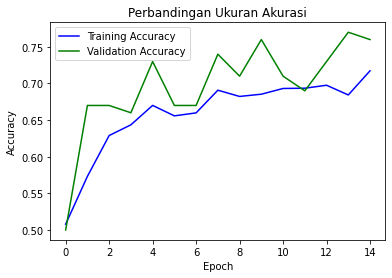

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history1.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history1.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()
plt.subplot(1 ,2, 1)

#Plot training and validation loss per epoch
plt.plot(epochs, history1.history['loss'], label='Training Loss', color='blue')
plt.plot(history1.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()
plt.subplot(1 ,2, 2)

plt.show()

## VGG16

In [ ]:
preprocess_input = vgg16.preprocess_input

train_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator2 = train_datagen2.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

test_generator2 = test_datagen2.flow_from_directory(
	test_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2940 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
vgg16_model = vgg16.VGG16(input_shape=(250, 250, 3), include_top=False)

for layer in vgg16_model.layers:
  layer.trainable = False
vgg16_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [ ]:
last_layer = vgg16_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 512)


In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)                
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model2 = Model(vgg16_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc2 = ModelCheckpoint(filepath="Model2_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history2 = model2.fit(
    train_generator2, epochs=15, verbose=2, callbacks=[es, mc2], 
    validation_data=test_generator2, validation_steps=10) 

Epoch 1/15
10/10 - 16s - loss: 0.0212 - accuracy: 0.9959 - val_loss: 0.0206 - val_accuracy: 0.9900 - 16s/epoch - 2s/step
Epoch 2/15
10/10 - 16s - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0070 - val_accuracy: 1.0000 - 16s/epoch - 2s/step
Epoch 3/15
10/10 - 16s - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.0037 - val_accuracy: 1.0000 - 16s/epoch - 2s/step
Epoch 4/15
10/10 - 16s - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0029 - val_accuracy: 1.0000 - 16s/epoch - 2s/step
Epoch 5/15
10/10 - 16s - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.0022 - val_accuracy: 1.0000 - 16s/epoch - 2s/step
Epoch 6/15
10/10 - 16s - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0019 - val_accuracy: 1.0000 - 16s/epoch - 2s/step
Epoch 7/15
10/10 - 16s - loss: 0.0047 - accuracy: 0.9980 - val_loss: 0.0017 - val_accuracy: 1.0000 - 16s/epoch - 2s/step


In [ ]:
model2.evaluate(train_generator2)
model2.evaluate(test_generator2)

10/10 [==============================] - 1s 65ms/step - loss: 0.0070 - accuracy: 1.0000


[0.0069895293563604355, 1.0]

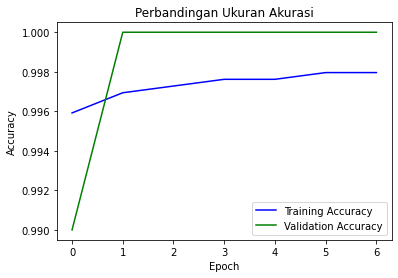

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history2.history['accuracy']))

plt.plot(epochs, history2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

##VGG19

In [ ]:
preprocess_input2 = vgg19.preprocess_input

train_datagen3 = ImageDataGenerator(preprocessing_function=preprocess_input2)
test_datagen3 = ImageDataGenerator(preprocessing_function=preprocess_input2)

train_generator3 = train_datagen3.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

test_generator3 = test_datagen3.flow_from_directory(
	test_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2940 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
vgg19_model = vgg19.VGG19(input_shape=(250, 250, 3), include_top=False)

for layer in vgg19_model.layers:
  layer.trainable = False
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
last_layer2 = vgg19_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer2.output_shape)
last_output2 = last_layer2.output

last layer output shape:  (None, 6, 6, 512)


In [ ]:
x2 = tf.keras.layers.Flatten()(last_output2)
x2 = tf.keras.layers.Dense(512, activation='relu')(x2)                
x2 = tf.keras.layers.Dense(1, activation='sigmoid')(x2)           

# Append the dense network to the base model
model3 = Model(vgg19_model.input, x2)    

# Print the model summary. See your dense network connected at the end.
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc3 = ModelCheckpoint(filepath="Model3_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history3 = model3.fit(
    train_generator3, epochs=15, verbose=2, callbacks=[es, mc3], 
    validation_data=test_generator3, validation_steps=10) 

Epoch 1/15
10/10 - 46s - loss: 7.0172 - accuracy: 0.6949 - val_loss: 0.7766 - val_accuracy: 0.7600 - 46s/epoch - 5s/step
Epoch 2/15
10/10 - 19s - loss: 0.5263 - accuracy: 0.7779 - val_loss: 0.3656 - val_accuracy: 0.8500 - 19s/epoch - 2s/step
Epoch 3/15
10/10 - 18s - loss: 0.3197 - accuracy: 0.8728 - val_loss: 0.3049 - val_accuracy: 0.8800 - 18s/epoch - 2s/step
Epoch 4/15
10/10 - 18s - loss: 0.2211 - accuracy: 0.9136 - val_loss: 0.2260 - val_accuracy: 0.9000 - 18s/epoch - 2s/step
Epoch 5/15
10/10 - 18s - loss: 0.1603 - accuracy: 0.9412 - val_loss: 0.1607 - val_accuracy: 0.9400 - 18s/epoch - 2s/step
Epoch 6/15
10/10 - 17s - loss: 0.1116 - accuracy: 0.9673 - val_loss: 0.1139 - val_accuracy: 0.9400 - 17s/epoch - 2s/step
Epoch 7/15
10/10 - 18s - loss: 0.0795 - accuracy: 0.9854 - val_loss: 0.0774 - val_accuracy: 0.9800 - 18s/epoch - 2s/step
Epoch 8/15
10/10 - 18s - loss: 0.0595 - accuracy: 0.9918 - val_loss: 0.0567 - val_accuracy: 0.9900 - 18s/epoch - 2s/step
Epoch 9/15
10/10 - 18s - loss: 0

In [ ]:
model3.evaluate(train_generator3)
model3.evaluate(test_generator3)

10/10 [==============================] - 1s 72ms/step - loss: 0.0410 - accuracy: 1.0000


[0.04100394248962402, 1.0]

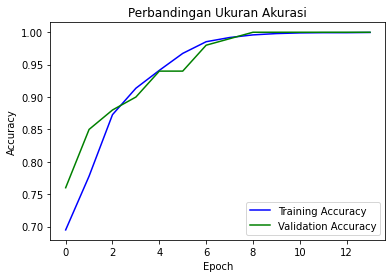

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history3.history['accuracy']))

plt.plot(epochs, history3.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Efficient Net B0

In [ ]:
preprocess_input3 = efficientnet.preprocess_input

train_datagen4 = ImageDataGenerator(preprocessing_function=preprocess_input3)
test_datagen4 = ImageDataGenerator(preprocessing_function=preprocess_input3)

train_generator4 = train_datagen4.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

test_generator4 = test_datagen4.flow_from_directory(
	test_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2940 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
en_model = efficientnet.EfficientNetB0(input_shape=(250, 250, 3), include_top=False)

for layer in en_model.layers:
  layer.trainable = False
en_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 200, 200, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 201, 201, 3)  0           ['normalization[0][0

In [ ]:
last_layer3 = en_model.get_layer('top_conv')
print('last layer output shape: ', last_layer3.output_shape)
last_output3 = last_layer3.output

last layer output shape:  (None, 7, 7, 1280)


In [ ]:
x3 = tf.keras.layers.Flatten()(last_output3)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)                
x3 = tf.keras.layers.Dense(1, activation='sigmoid')(x3)           

# Append the dense network to the base model
model4 = Model(en_model.input, x3)    

# Print the model summary. See your dense network connected at the end.
model4.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 200, 200, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 201, 201, 3)  0           ['normalization[0][0]']    

In [ ]:
model4.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc4 = ModelCheckpoint(filepath="Model4_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history4 = model4.fit(
    train_generator4, epochs=15, verbose=2, callbacks=[es, mc4], 
    validation_data=test_generator4, validation_steps=10) 

Epoch 1/15
10/10 - 21s - loss: 95.4421 - accuracy: 0.5949 - val_loss: 42.5404 - val_accuracy: 0.6200 - 21s/epoch - 2s/step
Epoch 2/15
10/10 - 13s - loss: 9.5305 - accuracy: 0.7310 - val_loss: 6.6844 - val_accuracy: 0.6900 - 13s/epoch - 1s/step
Epoch 3/15
10/10 - 11s - loss: 2.6185 - accuracy: 0.7799 - val_loss: 3.6562 - val_accuracy: 0.6900 - 11s/epoch - 1s/step
Epoch 4/15
10/10 - 13s - loss: 1.2409 - accuracy: 0.8194 - val_loss: 1.4885 - val_accuracy: 0.7600 - 13s/epoch - 1s/step
Epoch 5/15
10/10 - 13s - loss: 0.6767 - accuracy: 0.8418 - val_loss: 0.6871 - val_accuracy: 0.7800 - 13s/epoch - 1s/step
Epoch 6/15
10/10 - 13s - loss: 0.4667 - accuracy: 0.8565 - val_loss: 0.7922 - val_accuracy: 0.7900 - 13s/epoch - 1s/step
Epoch 7/15
10/10 - 13s - loss: 0.3702 - accuracy: 0.8684 - val_loss: 0.3635 - val_accuracy: 0.8400 - 13s/epoch - 1s/step
Epoch 8/15
10/10 - 11s - loss: 0.2621 - accuracy: 0.9003 - val_loss: 0.3450 - val_accuracy: 0.8300 - 11s/epoch - 1s/step
Epoch 9/15
10/10 - 11s - loss:

In [ ]:
model4.evaluate(train_generator4)
model4.evaluate(test_generator4)

10/10 [==============================] - 0s 41ms/step - loss: 0.1305 - accuracy: 0.9700


[0.13047504425048828, 0.9700000286102295]

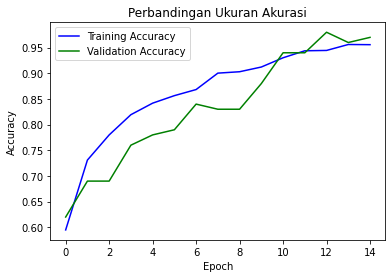

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history4.history['accuracy']))

plt.plot(epochs, history4.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Mobile Net

In [ ]:
preprocess_input4 = mobilenet.preprocess_input

train_datagen5 = ImageDataGenerator(preprocessing_function=preprocess_input4)
test_datagen5 = ImageDataGenerator(preprocessing_function=preprocess_input4)

train_generator5 = train_datagen5.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

test_generator5 = test_datagen5.flow_from_directory(
	test_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2940 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
mn_model = mobilenet.MobileNet(input_shape=(250, 250, 3), include_top=False)

for layer in mn_model.layers:
  layer.trainable = False
mn_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32)     128       
 ation)                                         

In [ ]:
last_layer4 = mn_model.get_layer('conv_pw_13_relu')
print('last layer output shape: ', last_layer4.output_shape)
last_output4 = last_layer4.output

last layer output shape:  (None, 6, 6, 1024)


In [ ]:
x4 = tf.keras.layers.Flatten()(last_output4)
x4 = tf.keras.layers.Dense(512, activation='relu')(x4)                
x4 = tf.keras.layers.Dense(1, activation='sigmoid')(x4)           

# Append the dense network to the base model
model5 = Model(mn_model.input, x4)    

# Print the model summary. See your dense network connected at the end.
model5.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32)     128       
 ation)                                                      

In [ ]:
model5.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc5 = ModelCheckpoint(filepath="Model5_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history5 = model5.fit(
    train_generator5, epochs=15, verbose=2, callbacks=[es, mc5], 
    validation_data=test_generator5, validation_steps=10)

Epoch 1/15
10/10 - 19s - loss: 12.4384 - accuracy: 0.5371 - val_loss: 0.7188 - val_accuracy: 0.5700 - 19s/epoch - 2s/step
Epoch 2/15
10/10 - 12s - loss: 0.5937 - accuracy: 0.6867 - val_loss: 0.5589 - val_accuracy: 0.6600 - 12s/epoch - 1s/step
Epoch 3/15
10/10 - 11s - loss: 0.4500 - accuracy: 0.7857 - val_loss: 0.4256 - val_accuracy: 0.8100 - 11s/epoch - 1s/step
Epoch 4/15
10/10 - 11s - loss: 0.3397 - accuracy: 0.8510 - val_loss: 0.3575 - val_accuracy: 0.8600 - 11s/epoch - 1s/step
Epoch 5/15
10/10 - 12s - loss: 0.2591 - accuracy: 0.8983 - val_loss: 0.2637 - val_accuracy: 0.9100 - 12s/epoch - 1s/step
Epoch 6/15
10/10 - 11s - loss: 0.1881 - accuracy: 0.9364 - val_loss: 0.2279 - val_accuracy: 0.9100 - 11s/epoch - 1s/step
Epoch 7/15
10/10 - 12s - loss: 0.1399 - accuracy: 0.9602 - val_loss: 0.1565 - val_accuracy: 0.9500 - 12s/epoch - 1s/step
Epoch 8/15
10/10 - 12s - loss: 0.0952 - accuracy: 0.9779 - val_loss: 0.0974 - val_accuracy: 0.9800 - 12s/epoch - 1s/step
Epoch 9/15
10/10 - 11s - loss: 

In [ ]:
model5.evaluate(train_generator5)
model5.evaluate(test_generator5)

10/10 [==============================] - 0s 44ms/step - loss: 0.0120 - accuracy: 1.0000


[0.011956820264458656, 1.0]

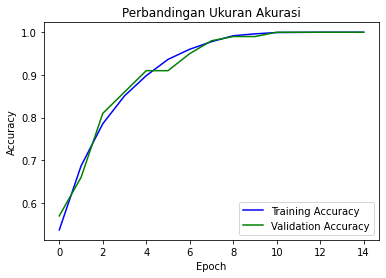

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history5.history['accuracy']))

plt.plot(epochs, history5.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Inception V3

In [ ]:
preprocess_input5 = inception_v3.preprocess_input

train_datagen6 = ImageDataGenerator(preprocessing_function=preprocess_input5)
test_datagen6 = ImageDataGenerator(preprocessing_function=preprocess_input5)

train_generator6 = train_datagen6.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

test_generator6 = test_datagen6.flow_from_directory(
	test_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

In [ ]:
in_model = inception_v3.InceptionV3(input_shape=(250, 250, 3), include_top=False)

for layer in in_model.layers:
  layer.trainable = False
mn_model.summary()

In [ ]:
last_layer5 = in_model.get_layer('conv_pw_13_relu')
print('last layer output shape: ', last_layer5.output_shape)
last_output5 = last_layer5.output

In [ ]:
x5 = tf.keras.layers.Flatten()(last_output5)
x5 = tf.keras.layers.Dense(512, activation='relu')(x5)                
x5 = tf.keras.layers.Dense(1, activation='sigmoid')(x5)           

# Append the dense network to the base model
model6 = Model(in_model.input, x5)    

# Print the model summary. See your dense network connected at the end.
model6.summary()

# **Testing**

In [ ]:
## change image_width and image_height
nrows = 200
ncolumns  = 200

def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

In [ ]:
import random
random.shuffle(test_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X = np.array(X_test)

In [ ]:
## change model
pred = model4.predict(X)
threshold = 0.5
predictions = np.where(pred > threshold, 1,0)

In [ ]:
test = pd.DataFrame(data = predictions, columns = ["predictions"])
test
test["filename"] = [os.path.basename(i) for i in test_imgs]
test["test_labels"] = y_test
test = test[["filename", "test_labels", "predictions"]]
test

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.countplot(test["predictions"], saturation=1)

In [ ]:
model_accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy: {:.2f}%".format(model_accuracy * 100))

In [ ]:
cl_report = classification_report(y_test, predictions)
print(cl_report)

In [ ]:
cn_matrix= confusion_matrix(y_test, predictions)
cn_matrix

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc= auc(fpr, tpr)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([1,0], [1,0], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic curve")
plt.legend(loc = 'lower right')

In [ ]:
plt.figure(figsize=(4,4))
for val, i in enumerate(test_imgs[:10]):
    img = mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.title(os.path.basename(i) + ' - Prediction: ' +  f"{'Autistic' if predictions[val] == 1 else 'Non-Autistic'}")
    plt.show()

# Deployment